In [1]:
from data.nyuv2 import NYUDepthV2
from torchvision import transforms
from torch.utils.data import DataLoader
import torch

image_t = transforms.Compose([
    transforms.CenterCrop(400),
    transforms.Resize(64),
    transforms.ToTensor(),
])

crop_t = transforms.Compose([
    transforms.CenterCrop(400)
])

dataset = NYUDepthV2(root='data', download=True, preload=False, image_transform=image_t, seg_transform=crop_t, depth_transform=crop_t)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=0)

Dataset already exists, skipping download.


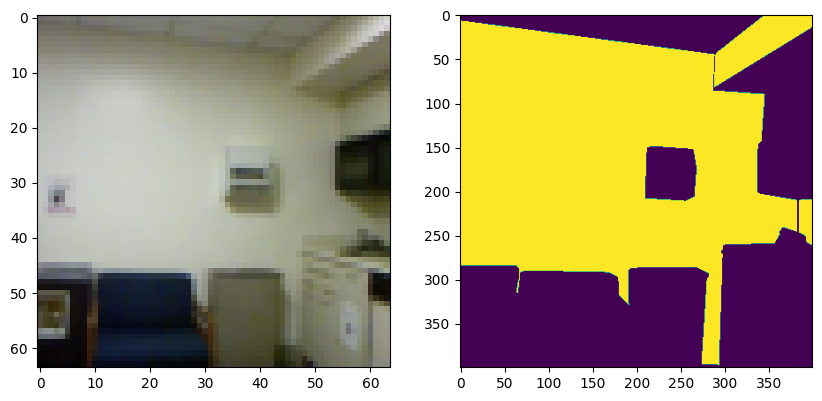

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dataset[0][0].permute(1, 2, 0))

plt.subplot(1, 2, 2)
plt.imshow(dataset[0][1] == 21)


In [3]:
dataset.resolved_names[0]

np.str_('book')

In [4]:
from collections import defaultdict
import numpy as np

class_occurrences = defaultdict(int)

for idx, data in enumerate(train_loader):
    
    # Iterate through the classes
    for c in torch.unique(data[1]):
        class_occurrences[c.item()] += 1

IndexError: index 894 is out of bounds for axis 0 with size 894

In [5]:
np.unique(dataset[22][1])

array([ 0,  1,  3,  4,  5, 11, 15, 21, 26, 34, 36, 42, 56, 62, 83, 96, 97],
      dtype=uint16)

In [7]:
dataset.resolved_names[1]

np.str_('bottle')

In [8]:
len(dataset[22][3])

0

In [9]:
np.unique(dataset[22][1])

array([ 0,  1,  3,  4,  5, 11, 15, 21, 26, 34, 36, 42, 56, 62, 83, 96, 97],
      dtype=uint16)

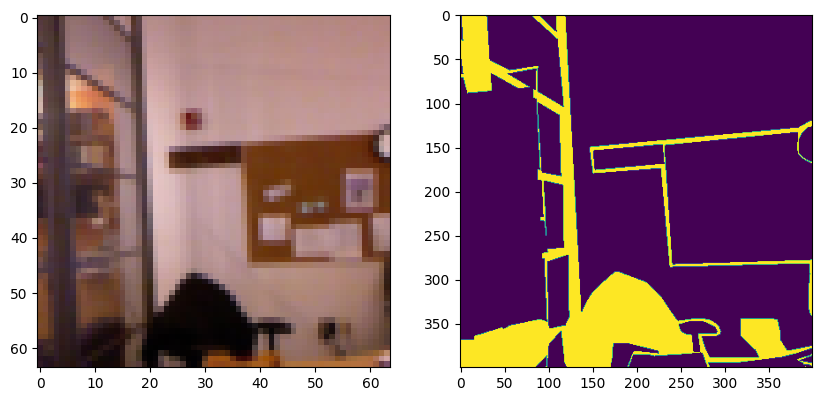

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dataset[22][0].permute(1, 2, 0))

plt.subplot(1, 2, 2)
plt.imshow(dataset[22][1] == 0)

Text(0.5, 1.0, 'Number of occurrences of each class in the dataset')

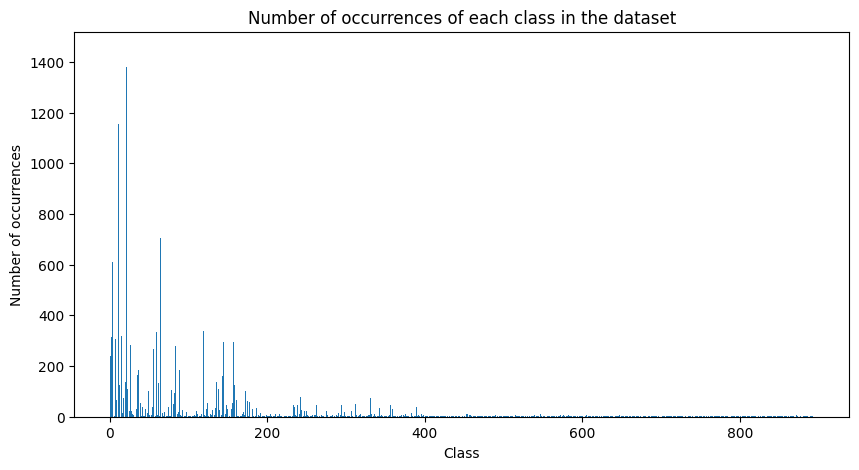

In [11]:
#plot barplot of class occurrences
plt.figure(figsize=(10, 5))
plt.bar(class_occurrences.keys(), class_occurrences.values())
plt.xlabel('Class')
plt.ylabel('Number of occurrences')
plt.title('Number of occurrences of each class in the dataset')

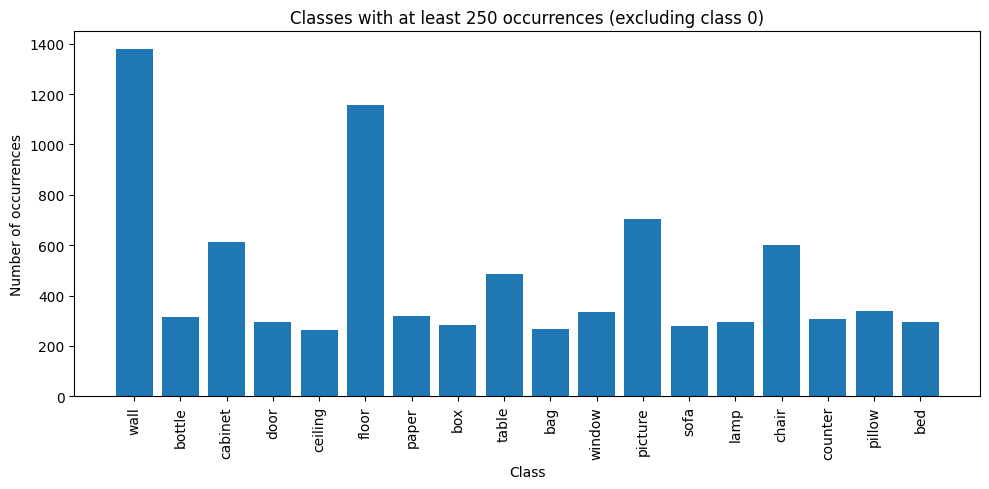

In [12]:
LEAST_N_SAMPLES = 250

plt.figure(figsize=(10, 5))

# Filter classes that occur at least LEAST_N_SAMPLES times and skip class 0 explicitly
filtered_classes = [k for k, v in class_occurrences.items() if v >= LEAST_N_SAMPLES and k != 0]
filtered_counts = [v for k, v in class_occurrences.items() if v >= LEAST_N_SAMPLES and k != 0]

# Create sequential x positions for the bars
x_positions = range(len(filtered_classes))

# Assign labels to the x-ticks using dataset.resolved_names
# Adjust indices for the resolved names by subtracting 1 because class 0 is not in resolved_names
resolved_labels = [dataset.resolved_names[k-1] for k in filtered_classes]

# Plot the filtered classes with sequential x positions
plt.bar(x_positions, filtered_counts)

# Set the x-ticks to the sequential positions and assign resolved labels
plt.xticks(x_positions, resolved_labels, rotation=90)

plt.xlabel('Class')
plt.ylabel('Number of occurrences')
plt.title(f'Classes with at least {LEAST_N_SAMPLES} occurrences (excluding class 0)')

plt.tight_layout()
plt.show()


In [14]:
len(filtered_classes)

18

In [16]:
from tqdm import tqdm

dataset = NYUDepthV2(root='data', download=True, preload=False, image_transform=image_t, seg_transform=crop_t, depth_transform=crop_t, filtered_classes=[5, 11, 21, 26, 2, 3, 7, 64, 144, 19, 119, 157, 28, 55, 15, 59, 4, 83])
train_loader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=0)

pbar = tqdm(train_loader, desc=f"Epoch")
for i, (img, seg, depth, class_vec, depth_ved) in enumerate(pbar):
    print(i)
    break
   

Dataset already exists, skipping download.


Epoch:   0%|          | 0/1449 [00:00<?, ?it/s]

0
